In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy #should research
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint #should research

from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential


import os

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
input_path = 'C:/Users/HP/Desktop/MY PROJECT/MODIFIED LENET/input/'
os.listdir(input_path)

['HAM10000_images_part_1',
 'HAM10000_images_part_2',
 'HAM10000_metadata.csv',
 'hmnist_28_28_L.csv',
 'hmnist_28_28_RGB.csv',
 'hmnist_8_8_L.csv',
 'hmnist_8_8_RGB.csv']

In [3]:
main_dir = 'main_dir'
os.mkdir(main_dir)

train_dir = os.path.join(main_dir, 'train_dir')
os.mkdir(train_dir)

val_dir = os.path.join(main_dir, 'val_dir')
os.mkdir(val_dir)

test_dir = os.path.join(main_dir, 'test_dir')
os.mkdir(test_dir)

nv = os.path.join(train_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(train_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(train_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(train_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(train_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(train_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(train_dir, 'df')
os.mkdir(df)

nv = os.path.join(test_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(test_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(test_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(test_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(test_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(test_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(test_dir, 'df')
os.mkdir(df)


nv = os.path.join(val_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(val_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(val_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(val_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(val_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(val_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(val_dir, 'df')
os.mkdir(df)



In [4]:
df_data = pd.read_csv(input_path + 'HAM10000_metadata.csv')

df_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [5]:
df = df_data.groupby('lesion_id').count()

df = df[df['image_id'] == 1]

df.reset_index(inplace=True) #should research

In [6]:
def identify_duplicates(x):
    
    unique_list = list(df['lesion_id'])
    
    if x in unique_list:
        return 'no_duplicates'
    else:
        return 'has_duplicates'
    
df_data['duplicates'] = df_data['lesion_id']

df_data['duplicates'] = df_data['duplicates'].apply(identify_duplicates)

In [7]:
df = df_data[df_data['duplicates'] == 'no_duplicates']

y = df['dx']
print(df.shape)

#_, df_val = train_test_split(df, test_size = 0.17, random_state=101, stratify=y)
#should research
df_train, df_test, y_train, y_test = train_test_split(df, y, test_size=0.3627, random_state=1)

df_test, df_val, y_test, y_val = train_test_split(df_test, y_test, test_size=0.5, random_state=1)
print(df_train.shape)
print(df_test.shape)
print(df_val.shape)

(5514, 8)
(3514, 8)
(1000, 8)
(1000, 8)


In [8]:
def identify_val_rows(x):
    
    val_list = list(df_val['image_id'])
    
    if str(x) in val_list:
        return 'val'
    else:
        return 'train'
    
    
df_data['train_or_val'] = df_data['image_id']

df_data['train_or_val'] = df_data['train_or_val'].apply(identify_val_rows)

df_train = df_data[df_data['train_or_val'] == 'train']

In [9]:
df_data.set_index('image_id', inplace=True)

folder_1 = os.listdir(input_path + 'ham10000_images_part_1')
folder_2 = os.listdir(input_path + 'ham10000_images_part_2')

train_list = list(df_train['image_id'])
val_list = list(df_val['image_id'])
test_list = list(df_test['image_id'])



for image in train_list:
    
    file_name = image + '.jpg'
    label = df_data.loc[image, 'dx']
    
    if file_name in folder_1:
        
        src = os.path.join(input_path + 'ham10000_images_part_1', file_name)
        dst = os.path.join(train_dir, label, file_name)
        
        shutil.copy(src, dst)
    
    if file_name in folder_2:
        
        src = os.path.join(input_path + 'ham10000_images_part_2', file_name)
        dst = os.path.join(train_dir, label, file_name)
        
        shutil.copy(src, dst)
        

for image in val_list:
    
    file_name = image + '.jpg'
    label = df_data.loc[image, 'dx']
    
    if file_name in folder_1:
        
        src = os.path.join(input_path + 'ham10000_images_part_1', file_name)
        dst = os.path.join(val_dir, label, file_name)
        
        shutil.copy(src, dst)
    
    if file_name in folder_2:
        
        src = os.path.join(input_path + 'ham10000_images_part_2', file_name)
        dst = os.path.join(val_dir, label, file_name)
        
        shutil.copy(src, dst)
        
for image in test_list:
    
    file_name = image + '.jpg'
    label = df_data.loc[image, 'dx']
    
    if file_name in folder_1:
        
        src = os.path.join(input_path + 'ham10000_images_part_1', file_name)
        dst = os.path.join(test_dir, label, file_name)
        
        shutil.copy(src, dst)
    
    if file_name in folder_2:
        
        src = os.path.join(input_path + 'ham10000_images_part_2', file_name)
        dst = os.path.join(test_dir, label, file_name)
        
        shutil.copy(src, dst)
        
        


In [10]:
class_list = ['mel', 'bkl','bcc','akiec','vasc','df']

for clas in class_list:
    aug_dir = 'aug_dir'
    os.mkdir(aug_dir)
    
    img_dir = os.path.join(aug_dir, 'img_dir')
    os.mkdir(img_dir)
    
    img_class = clas
    
    img_list = os.listdir(train_dir +"/"+ img_class)
    
    for fname in img_list:
        
        src = os.path.join(train_dir +"/" + img_class,fname)
        dst = os.path.join(img_dir,fname)
       # dst = img_dir
        
        shutil.copy(src, dst)
        
    path = aug_dir
    save_path = train_dir +"/" + img_class
    
    datagen = ImageDataGenerator(rotation_range=180,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.1,horizontal_flip=True,vertical_flip=True,fill_mode='nearest')
    batch_size = 50
    
    aug_datagen = datagen.flow_from_directory(path, save_to_dir = save_path, save_format='jpg',target_size=(224,224),batch_size=batch_size)
    
    num_aug_imgs_wanted = 6000
    num_files = len(os.listdir(img_dir))
    num_batches = int(np.ceil((num_aug_imgs_wanted - num_files)/batch_size))
    
    for i in range(0, num_batches):
        imgs, labels = next(aug_datagen) #should research
        
    shutil.rmtree('aug_dir')

Found 1065 images belonging to 1 classes.
Found 1023 images belonging to 1 classes.
Found 491 images belonging to 1 classes.
Found 301 images belonging to 1 classes.
Found 134 images belonging to 1 classes.
Found 106 images belonging to 1 classes.


In [11]:
num_train_samples = 8000
num_val_samples = 1000
num_test_samples = 1000
train_batch_size = 10
val_batch_size = 10
test_batch_size = 10

image_size = 128

train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)
test_steps = np.ceil(num_val_samples / test_batch_size)

In [12]:
datagen = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input)

train_batches = datagen.flow_from_directory(train_dir,target_size = (image_size, image_size), batch_size=train_batch_size)

val_batches = datagen.flow_from_directory(val_dir,target_size=(image_size, image_size), batch_size=val_batch_size)

test_batches = datagen.flow_from_directory(test_dir, target_size=(image_size, image_size), batch_size=1,shuffle=False)


Found 38544 images belonging to 7 classes.
Found 1000 images belonging to 7 classes.
Found 1000 images belonging to 7 classes.


In [13]:
model = Sequential()
model.add(Convolution2D(6, kernel_size=(5, 5), activation='relu', input_shape=(128, 128, 3)))
model.add(Convolution2D(12, kernel_size=(7, 7), activation='relu'))
model.add(Convolution2D(24, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(7, activation='softmax'))
# # model.summary()
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Convolution2D(16, kernel_size=(5, 5), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(120, activation='relu'))
# model.add(Dense(84, activation='relu'))
# model.add(Dense(7, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 6)       456       
                                                                 
 conv2d_1 (Conv2D)           (None, 118, 118, 12)      3540      
                                                                 
 conv2d_2 (Conv2D)           (None, 116, 116, 24)      2616      
                                                                 
 max_pooling2d (MaxPooling2  (None, 58, 58, 24)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 54, 54, 32)        19232     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 27, 27, 32)        0         
 g2D)                                                   

Filter-1
Channel -1: 
[[-0.01493867 -0.05289115  0.02799975 -0.04218988  0.04123048 -0.04009907
   0.02119061]
 [-0.00169232 -0.00717772 -0.01738808 -0.0589347  -0.05718099  0.05397373
   0.07416077]
 [-0.00448725 -0.04246245  0.02623275  0.05291303  0.06364717  0.03307391
   0.06586653]
 [ 0.08012705 -0.02194844  0.05491234 -0.0044136  -0.04219244 -0.07975292
   0.05935575]
 [-0.02623772 -0.04843474  0.03402977  0.02455795 -0.01088822  0.07277231
   0.04622626]
 [ 0.00513395 -0.04399535  0.08096461 -0.03686198 -0.02717051 -0.05492675
  -0.03943309]
 [-0.08213008  0.03389041  0.01544406 -0.06886164 -0.0665329  -0.03748698
  -0.04939999]]
Channel -2: 
[[ 0.06522806  0.04470839 -0.03522785 -0.04900231 -0.0108317  -0.04346799
  -0.02311788]
 [-0.00798009 -0.01066145  0.0312439  -0.01656564  0.03793171  0.06479828
  -0.02729122]
 [-0.03938454  0.02819312  0.00901712  0.00810226  0.01863398  0.05900522
  -0.06527819]
 [ 0.02680404  0.02650563  0.01851522 -0.06876853 -0.03857658  0.02883972


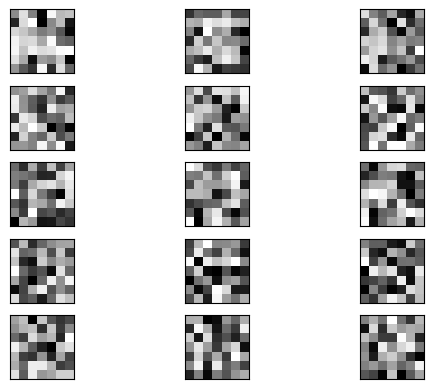

In [15]:
from matplotlib import pyplot
from matplotlib import pyplot as plt
filters, biases = model.layers[1].get_weights()

f = filters[:,:,:,2]
print("Filter-1")
print("Channel -1: ")
print(f[:,:,0])
print("Channel -2: ")
print(f[:,:,1])
print("Channel -3: ")
print(f[:,:,2])


# # normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# # plot first few filters
n_filters, ix = 5, 1
for i in range(n_filters):
# 	# get the filter
 	f = filters[:, :, :, i]
# 	# plot each channel separately
 	for j in range(3):
# 		# specify subplot and turn of axis
 		ax = pyplot.subplot(n_filters, 3, ix)
 		ax.set_xticks([])
 		ax.set_yticks([])
# 		# plot filter channel in grayscale
 		pyplot.imshow(f[:, :, j], cmap='gray')
 		ix += 1
# # show the figure
pyplot.show()


In [16]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])

history = model.fit(train_batches, steps_per_epoch=train_steps, epochs=25, validation_data= val_batches, validation_steps=val_steps)



Epoch 1/25


800/800 [==============================] - 129s 157ms/step - loss: 1.6686 - accuracy: 0.3523 - val_loss: 1.2195 - val_accuracy: 0.6250
Epoch 2/25
800/800 [==============================] - 126s 158ms/step - loss: 1.3707 - accuracy: 0.4759 - val_loss: 1.1791 - val_accuracy: 0.5880
Epoch 3/25
800/800 [==============================] - 124s 155ms/step - loss: 1.2393 - accuracy: 0.5251 - val_loss: 2.4258 - val_accuracy: 0.3910
Epoch 4/25
800/800 [==============================] - 126s 158ms/step - loss: 1.1616 - accuracy: 0.5567 - val_loss: 0.9822 - val_accuracy: 0.6480
Epoch 5/25
800/800 [==============================] - 122s 152ms/step - loss: 1.1270 - accuracy: 0.5746 - val_loss: 0.6105 - val_accuracy: 0.8150
Epoch 6/25
800/800 [==============================] - 124s 155ms/step - loss: 1.0869 - accuracy: 0.5976 - val_loss: 0.7032 - val_accuracy: 0.7690
Epoch 7/25
800/800 [==============================] - 126s 157ms/step - loss: 1.0818 - accuracy: 0.5987 - val_loss: 1.566

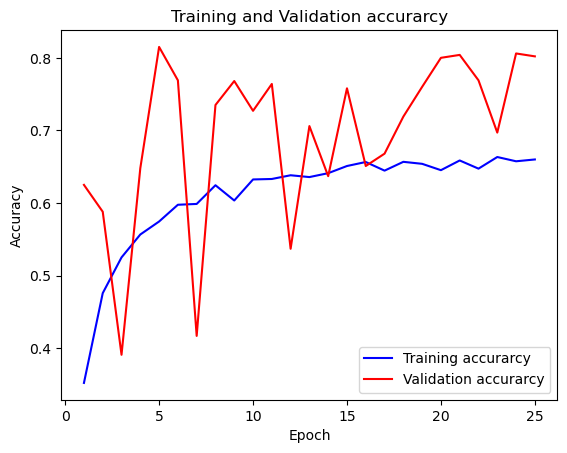

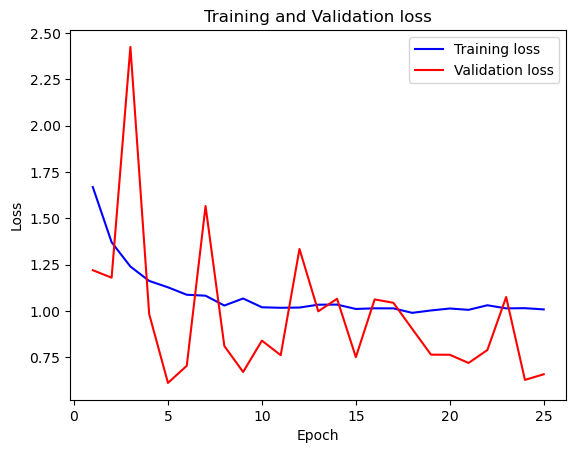

In [17]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
#Train and validation accuracy
plt.plot(epochs, accuracy, 'b', label='Training accurarcy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.savefig("PDD_lenet_acc.jpg",dpi=300)

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.savefig("PDD-lenet_loss.jpg",dpi=300)
plt.show()

In [18]:
model.save("model.h5")

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
filters, biases = model.layers[1].get_weights()
f = filters[:,:,:,2]
print("Filter-1")
print("Channel -1: ")
print(f[:,:,0])
print("Channel -2: ")
print(f[:,:,1])
print("Channel -3: ")
print(f[:,:,2])
# normalize filter values to 0-1 so we can visualize them
# f_min, f_max = filters.min(), filters.max()
# filters = (filters - f_min) / (f_max - f_min)
# # plot first few filters
# n_filters, ix = 5, 1
# for i in range(n_filters):
# 	# get the filter
# 	f = filters[:, :, :, i]
# 	# plot each channel separately
# 	for j in range(3):
# 		# specify subplot and turn of axis
# 		ax = pyplot.subplot(n_filters, 3, ix)
# 		ax.set_xticks([])
# 		ax.set_yticks([])
# 		# plot filter channel in grayscale
# 		pyplot.imshow(f[:, :, j], cmap='gray')
# 		ix += 1
# # show the figure
# pyplot.show()
# plt.savefig('filters.png')


Filter-1
Channel -1: 
[[-0.01689093 -0.06369388  0.00667279 -0.04986072  0.03282084 -0.05264554
   0.0105002 ]
 [-0.00806011 -0.01901557 -0.03593862 -0.09986692 -0.07918886  0.04815877
   0.07526264]
 [ 0.00019111 -0.05511728  0.00262113  0.00881602  0.03107635  0.03443469
   0.06574553]
 [ 0.07806767 -0.04029621  0.03282989 -0.03347573 -0.0596002  -0.08837206
   0.05523269]
 [-0.02014219 -0.05660489  0.02123446  0.00785903 -0.03944626  0.04451742
   0.03054083]
 [ 0.00536208 -0.04415393  0.05942993 -0.06190616 -0.05709606 -0.08607507
  -0.07742506]
 [-0.09190767  0.02113163  0.00762346 -0.09194424 -0.09156229 -0.06471584
  -0.09143487]]
Channel -2: 
[[ 0.06418937  0.02397038 -0.04559179 -0.08402131 -0.03752593 -0.06390603
  -0.04548191]
 [-0.00563927 -0.01676598  0.04142226 -0.02764467  0.01917548  0.05107288
  -0.06288017]
 [-0.06438926  0.01591327 -0.01227989 -0.00444425  0.02382471  0.05133914
  -0.08999659]
 [-0.00636312 -0.013743   -0.00285421 -0.0781834  -0.03795552  0.00522725


In [20]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from numpy import expand_dims

In [21]:
img = load_img(r'C:\Users\HP\Desktop\MY PROJECT\MODIFIED LENET\input\HAM10000_images_part_1\ISIC_0024306.jpg', target_size=(128, 128))
img = img_to_array(img)
img = expand_dims(img, axis=0)
img = preprocess_input(img)


1/1 [==============================] - 0s 221ms/step


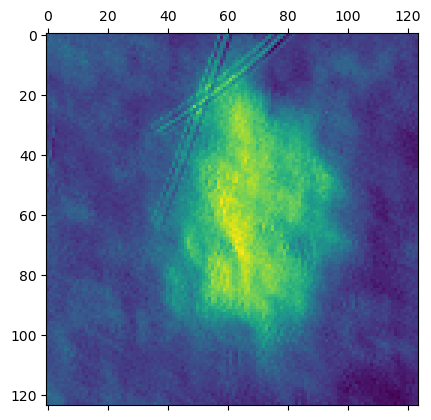

1/1 [==============================] - 0s 185ms/step


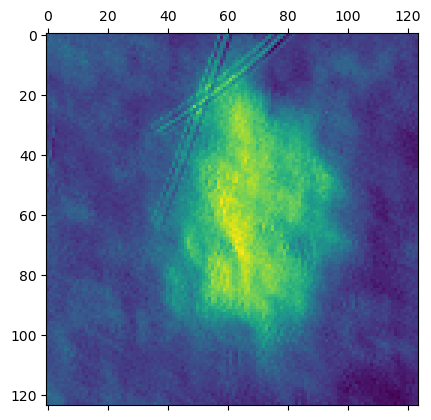

In [22]:
layer_outputs = [layer.output for layer in model.layers[:2]]
# Extracts the outputs of the top 12 layers
activation_model = Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

activations = activation_model.predict(img)

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
pyplot.show()

layer_outputs = [layer.output for layer in model.layers[:7]]
# Extracts the outputs of the top 12 layers
activation_model = Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

activations = activation_model.predict(img)

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
pyplot.show()


In [23]:
predictions = model.predict_generator(test_batches, steps=1000, verbose=1)

C:\Users\HP\AppData\Local\Temp\ipykernel_9336\226730412.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_batches, steps=1000, verbose=1)


1000/1000 [==============================] - 20s 19ms/step


In [24]:
loss, acc = model.evaluate_generator(test_batches, steps=1000, verbose=1)

   7/1000 [..............................] - ETA: 10s - loss: 1.6235 - accuracy: 0.2857     

C:\Users\HP\AppData\Local\Temp\ipykernel_9336\456876192.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, acc = model.evaluate_generator(test_batches, steps=1000, verbose=1)


1000/1000 [==============================] - 17s 17ms/step - loss: 0.4641 - accuracy: 0.8680


In [25]:
acc

0.8679999709129333

In [26]:
test_labels = test_batches.classes

In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig('confMat.png')

In [28]:
confusion_mat = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [29]:
test_batches.class_indices

{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}

Confusion matrix, without normalization
[[  5   3   9   0   0   0   0]
 [  0  31   4   0   1   1   0]
 [  0   9  49   0   2  21   0]
 [  0   1   0   0   0   2   0]
 [  1   1  17   0  13   7   0]
 [  0   8  25   4  11 758   3]
 [  0   0   0   0   0   2  12]]


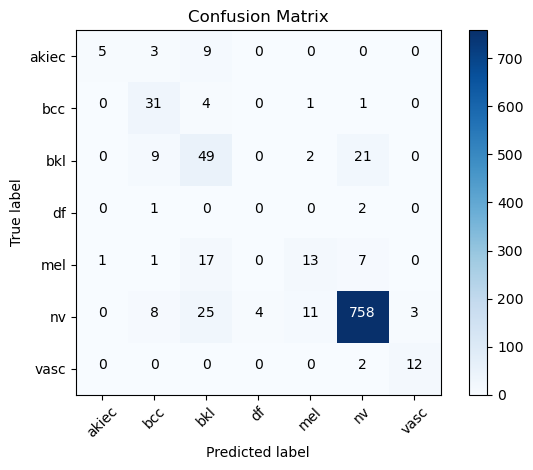

In [30]:
cm_plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel','nv', 'vasc']

plot_confusion_matrix(confusion_mat, cm_plot_labels, title='Confusion Matrix')